<div align="center">

-----
**UMTS/FT/DI** &ensp; &emsp;  &emsp; **Matière** : Data Mining &emsp;&emsp;&emsp;      **Master** : SIC2
-----
------
Réalisé par : Chems Eddine **BOUANANI**
------
-----
### **Solution TP 4** : Schiket learn
-----
</div>

## **Implementation Algorithme KPPV :**

In [ ]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing

In [ ]:
df = pd.read_csv("https://datahub.io/machine-learning/bioresponse/r/bioresponse.csv")
df.head()

,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,D16,D17,D18,D19,D20,D21,D22,D23,D24,D25,D26,D27,D28,D29,D30,D31,D32,D33,D34,D35,D36,D37,D38,D39,D40,...,D1738,D1739,D1740,D1741,D1742,D1743,D1744,D1745,D1746,D1747,D1748,D1749,D1750,D1751,D1752,D1753,D1754,D1755,D1756,D1757,D1758,D1759,D1760,D1761,D1762,D1763,D1764,D1765,D1766,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776,target
0,0.000000,0.497009,0.10,0.0,0.132956,0.678031,0.273166,0.585445,0.743663,0.243144,0.187856,0.0000,0.000000,0.069000,0.362012,0.301773,0.597930,0.190813,0.107219,0.070500,0.00717,0.137931,1.0,0.00,0.496683,0.753131,1.0,1.0,0.000000,0.262919,0.077200,0.082700,0.200590,0.00000,0.000000,0.0,0.0,0.162383,0.150153,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,0.366667,0.606291,0.05,0.0,0.111209,0.803455,0.106105,0.411754,0.836582,0.106480,0.101382,0.1875,0.193548,0.131001,0.350206,0.187419,0.762669,0.180473,0.329962,0.107681,0.01950,0.206897,0.0,0.75,0.449869,0.720484,0.0,0.0,0.666667,0.099400,0.289240,0.216710,0.100295,0.16958,0.235294,0.0,0.0,0.119104,0.075100,0.000000,...,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1
2,0.033300,0.480124,0.00,0.0,0.209791,0.610350,0.356453,0.517720,0.679051,0.352308,0.193548,0.1250,0.000000,0.068900,0.574628,0.283327,0.510633,0.184480,0.073300,0.061600,0.00566,0.000000,1.0,0.00,0.486610,0.803577,0.0,1.0,0.000000,0.428659,0.032400,0.072400,0.000000,0.03930,0.000000,0.0,0.0,0.076100,0.225229,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,0.000000,0.538825,0.00,0.5,0.196344,0.724230,0.235606,0.288764,0.805110,0.208989,0.000000,0.0000,0.000000,0.145947,0.584688,0.325247,0.496745,0.242288,0.087700,0.075300,0.01680,0.000000,1.0,0.00,0.459122,0.829482,0.0,1.0,0.000000,0.435410,0.118562,0.000000,0.000000,0.00000,0.000000,0.0,0.0,0.068900,0.000000,0.148444,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.100000,0.517794,0.00,0.0,0.494734,0.781422,0.154361,0.303809,0.812646,0.125177,0.532258,0.0000,0.000000,0.094900,0.540323,0.116775,0.552982,0.167897,0.116140,0.054200,0.01350,0.103448,1.0,0.00,0.381883,0.913374,0.0,1.0,0.000000,0.305333,0.054100,0.170822,0.000000,0.00000,0.176471,0.0,0.0,0.019900,0.057400,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [ ]:
df.columns

Index(['D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10',
       ...
       'D1768', 'D1769', 'D1770', 'D1771', 'D1772', 'D1773', 'D1774', 'D1775',
       'D1776', 'target'],
      dtype='object', length=1777)

> __Dans ce cas , on veut utiislier pas tous les colonnes__

In [ ]:
X=df[['D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10','D1768', 'D1769', 'D1770', 'D1771', 'D1772', 'D1773', 'D1774', 'D1775',
       'D1776']].values
X[0:5]

array([[0.        , 0.49700901, 0.1       , 0.        , 0.13295596,
        0.67803072, 0.27316604, 0.58544486, 0.74366319, 0.24314355,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        ],
       [0.36666667, 0.60629148, 0.05      , 0.        , 0.11120902,
        0.80345475, 0.10610506, 0.41175392, 0.83658232, 0.10647999,
        1.        , 1.        , 1.        , 0.        , 1.        ,
        0.        , 0.        , 1.        , 0.        ],
       [0.0333    , 0.48012427, 0.        , 0.        , 0.20979144,
        0.61035025, 0.35645266, 0.51771955, 0.67905143, 0.35230767,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.53882479, 0.        , 0.5       , 0.1963443 ,
        0.72422952, 0.23560589, 0.28876375, 0.8051096 , 0.20898861,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.   

In [ ]:
Y=df['target'].values
Y[0:5]

array([1, 1, 1, 1, 0])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split (X, Y, test_size=0.2, random_state=4)
print('train set', X_train.shape, Y_train.shape)
print('test set', X_test. shape, Y_test. shape)


train set (3000, 19) (3000,)
test set (751, 19) (751,)


- On a __3000__ instances donnée d'apprentissage.
- On a __751__ 751 instances donnée de test

#### Cela on veut calculer le __K__ :

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
K = 5

neigh = KNeighborsClassifier(n_neighbors = K).fit(X_train, Y_train)
neigh 

KNeighborsClassifier()

In [ ]:
yhat = neigh.predict(X_test)
yhat[0:5]

array([1, 0, 1, 0, 1])

In [ ]:
from sklearn import metrics
print("train set accuracy :", metrics.accuracy_score(Y_train, neigh.predict(X_train)))
print("\n test set evaluation :", metrics.accuracy_score(Y_test, yhat))

train set accuracy : 0.811

 test set evaluation : 0.7123834886817576


In [ ]:
ks= 20

mean_acc= np.zeros((ks-1))
std_acc = np.zeros((ks-1))
ConfustionMx = [];
for n in range (1, ks):
  neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train, Y_train)
  yhat=neigh.predict(X_test)
  mean_acc[n-1]=metrics.accuracy_score(Y_test, yhat)

  std_acc[n-1]=np.std(yhat==Y_test)/np.sqrt(yhat.shape[0])
  
mean_acc

array([0.69374168, 0.70838881, 0.71238349, 0.7150466 , 0.71238349,
       0.7150466 , 0.69640479, 0.71105193, 0.69241012, 0.69773635,
       0.68442077, 0.69107856, 0.67776298, 0.69107856, 0.68442077,
       0.68175766, 0.67909454, 0.67909454, 0.68175766])

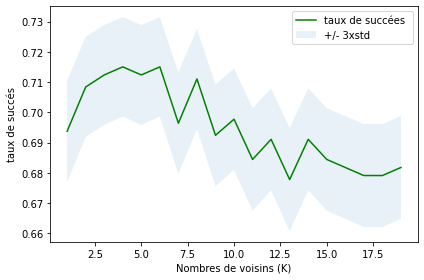

In [ ]:
plt.plot(range(1, ks), mean_acc,'g')
plt.fill_between(range(1, ks), mean_acc - 1 * std_acc, mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('taux de succées ', '+/- 3xstd'))
plt.ylabel('taux de succés')
plt.xlabel("Nombres de voisins (K)")
plt. tight_layout()
plt.show()

In [ ]:
print("Meilleur résultat est : ", mean_acc.max(), "Et K = ", mean_acc.argmax()+1)

Meilleur résultat est :  0.715046604527297 Et K =  4


:## **Implementation de arbre de décisions :**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

In [ ]:
data = pd.read_csv("https://datahub.io/machine-learning/bioresponse/r/bioresponse.csv", delimiter=",")
data[0:19]

,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,D16,D17,D18,D19,D20,D21,D22,D23,D24,D25,D26,D27,D28,D29,D30,D31,D32,D33,D34,D35,D36,D37,D38,D39,D40,...,D1738,D1739,D1740,D1741,D1742,D1743,D1744,D1745,D1746,D1747,D1748,D1749,D1750,D1751,D1752,D1753,D1754,D1755,D1756,D1757,D1758,D1759,D1760,D1761,D1762,D1763,D1764,D1765,D1766,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776,target
0,0.000000,0.497009,0.10,0.00,0.132956,0.678031,0.273166,0.585445,0.743663,0.243144,0.187856,0.0000,0.000000,0.069000,0.362012,0.301773,0.597930,0.190813,0.107219,0.070500,0.00717,0.137931,1.0,0.00,0.496683,0.753131,1.0,1.0,0.000000,0.262919,0.077200,0.082700,0.200590,0.000000,0.000000,0.000000,0.00000,0.162383,0.150153,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,0.366667,0.606291,0.05,0.00,0.111209,0.803455,0.106105,0.411754,0.836582,0.106480,0.101382,0.1875,0.193548,0.131001,0.350206,0.187419,0.762669,0.180473,0.329962,0.107681,0.01950,0.206897,0.0,0.75,0.449869,0.720484,0.0,0.0,0.666667,0.099400,0.289240,0.216710,0.100295,0.169580,0.235294,0.000000,0.00000,0.119104,0.075100,0.000000,...,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1
2,0.033300,0.480124,0.00,0.00,0.209791,0.610350,0.356453,0.517720,0.679051,0.352308,0.193548,0.1250,0.000000,0.068900,0.574628,0.283327,0.510633,0.184480,0.073300,0.061600,0.00566,0.000000,1.0,0.00,0.486610,0.803577,0.0,1.0,0.000000,0.428659,0.032400,0.072400,0.000000,0.039300,0.000000,0.000000,0.00000,0.076100,0.225229,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,0.000000,0.538825,0.00,0.50,0.196344,0.724230,0.235606,0.288764,0.805110,0.208989,0.000000,0.0000,0.000000,0.145947,0.584688,0.325247,0.496745,0.242288,0.087700,0.075300,0.01680,0.000000,1.0,0.00,0.459122,0.829482,0.0,1.0,0.000000,0.435410,0.118562,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.068900,0.000000,0.148444,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.100000,0.517794,0.00,0.00,0.494734,0.781422,0.154361,0.303809,0.812646,0.125177,0.532258,0.0000,0.000000,0.094900,0.540323,0.116775,0.552982,0.167897,0.116140,0.054200,0.01350,0.103448,1.0,0.00,0.381883,0.913374,0.0,1.0,0.000000,0.305333,0.054100,0.170822,0.000000,0.000000,0.176471,0.000000,0.00000,0.019900,0.057400,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
5,0.133333,0.771035,0.20,0.25,0.122153,0.677398,0.267224,0.611112,0.701421,0.330917,0.133065,0.0000,0.000000,0.158272,0.362084,0.326800,0.584021,0.263646,0.179323,0.083300,0.01140,0.103448,1.0,0.00,0.484955,0.762432,1.0,1.0,0.000000,0.261256,0.149914,0.130849,0.100295,0.046900,0.000000,0.047400,0.00000,0.099600,0.165689,0.129756,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
6,0.066700,0.567401,0.10,0.00,0.116578,0.689802,0.274886,0.548509,0.785429,0.252416,0.118280,0.0000,0.000000,0.092100,0.531522,0.298229,0.687331,0.187448,0.159876,0.066000,0.00913,0.103448,1.0,0.00,0.552854,0.705060,0.0,1.0,0.166667,0.203955,0.114303,0.203795,0.100295,0.000000,0.058800,0.000000,0.00000,0.150583,0.225229,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
7,0.133333,0.610057,0.15,0.00,0.105176,0.759602,0.313393,0.491790,0.756010,0.337262,0.039400,0.1875,0.000000,0.114518,0.561910,0.254881,0.647738,0.19934

In [ ]:
x= data[['D1','D2','D3','D4','D5','D6','D7','D8','D9','D10','D11','D12','D13','D14','D15','D16','D17','D18','D19',]].values
x[0:19]

array([[0.        , 0.49700901, 0.1       , 0.        , 0.13295596,
        0.67803072, 0.27316604, 0.58544486, 0.74366319, 0.24314355,
        0.18785579, 0.        , 0.        , 0.069     , 0.36201193,
        0.30177297, 0.5979305 , 0.1908129 , 0.10721878],
       [0.36666667, 0.60629148, 0.05      , 0.        , 0.11120902,
        0.80345475, 0.10610506, 0.41175392, 0.83658232, 0.10647999,
        0.10138249, 0.1875    , 0.19354839, 0.13100108, 0.35020588,
        0.18741933, 0.76266883, 0.1804734 , 0.32996215],
       [0.0333    , 0.48012427, 0.        , 0.        , 0.20979144,
        0.61035025, 0.35645266, 0.51771955, 0.67905143, 0.35230767,
        0.1935484 , 0.125     , 0.        , 0.0689    , 0.57462839,
        0.28332711, 0.51063264, 0.18448034, 0.0733    ],
       [0.        , 0.53882479, 0.        , 0.5       , 0.1963443 ,
        0.72422952, 0.23560589, 0.28876375, 0.8051096 , 0.20898861,
        0.        , 0.        , 0.        , 0.14594694, 0.58468822,
        0.325

In [ ]:
y=data["target"].values
y[0:19]

array([1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
from sklearn.model_selection import train_test_split
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.2, random_state=3)
biotree= DecisionTreeClassifier (criterion="entropy", max_depth=4)
biotree

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [ ]:
biotree.fit(X_trainset, y_trainset)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [ ]:
predTree = biotree.predict(X_testset)
print(predTree[0:19])
print(y_testset[0:19])

[1 0 1 0 0 1 1 1 1 1 1 1 1 0 1 0 0 1 0]
[1 0 1 1 1 0 0 1 1 1 0 1 0 0 1 1 0 1 0]


In [ ]:
from sklearn import metrics
import matplotlib.pyplot as plt

print(" le Taux de l'arbre de décision est : ",metrics.accuracy_score(y_testset, predTree))

 le Taux de l'arbre de décision est :  0.6431424766977364


In [ ]:
pip install graphviz

In [ ]:
from six import StringIO
#from sklearn.externals.six import Stringl0
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree

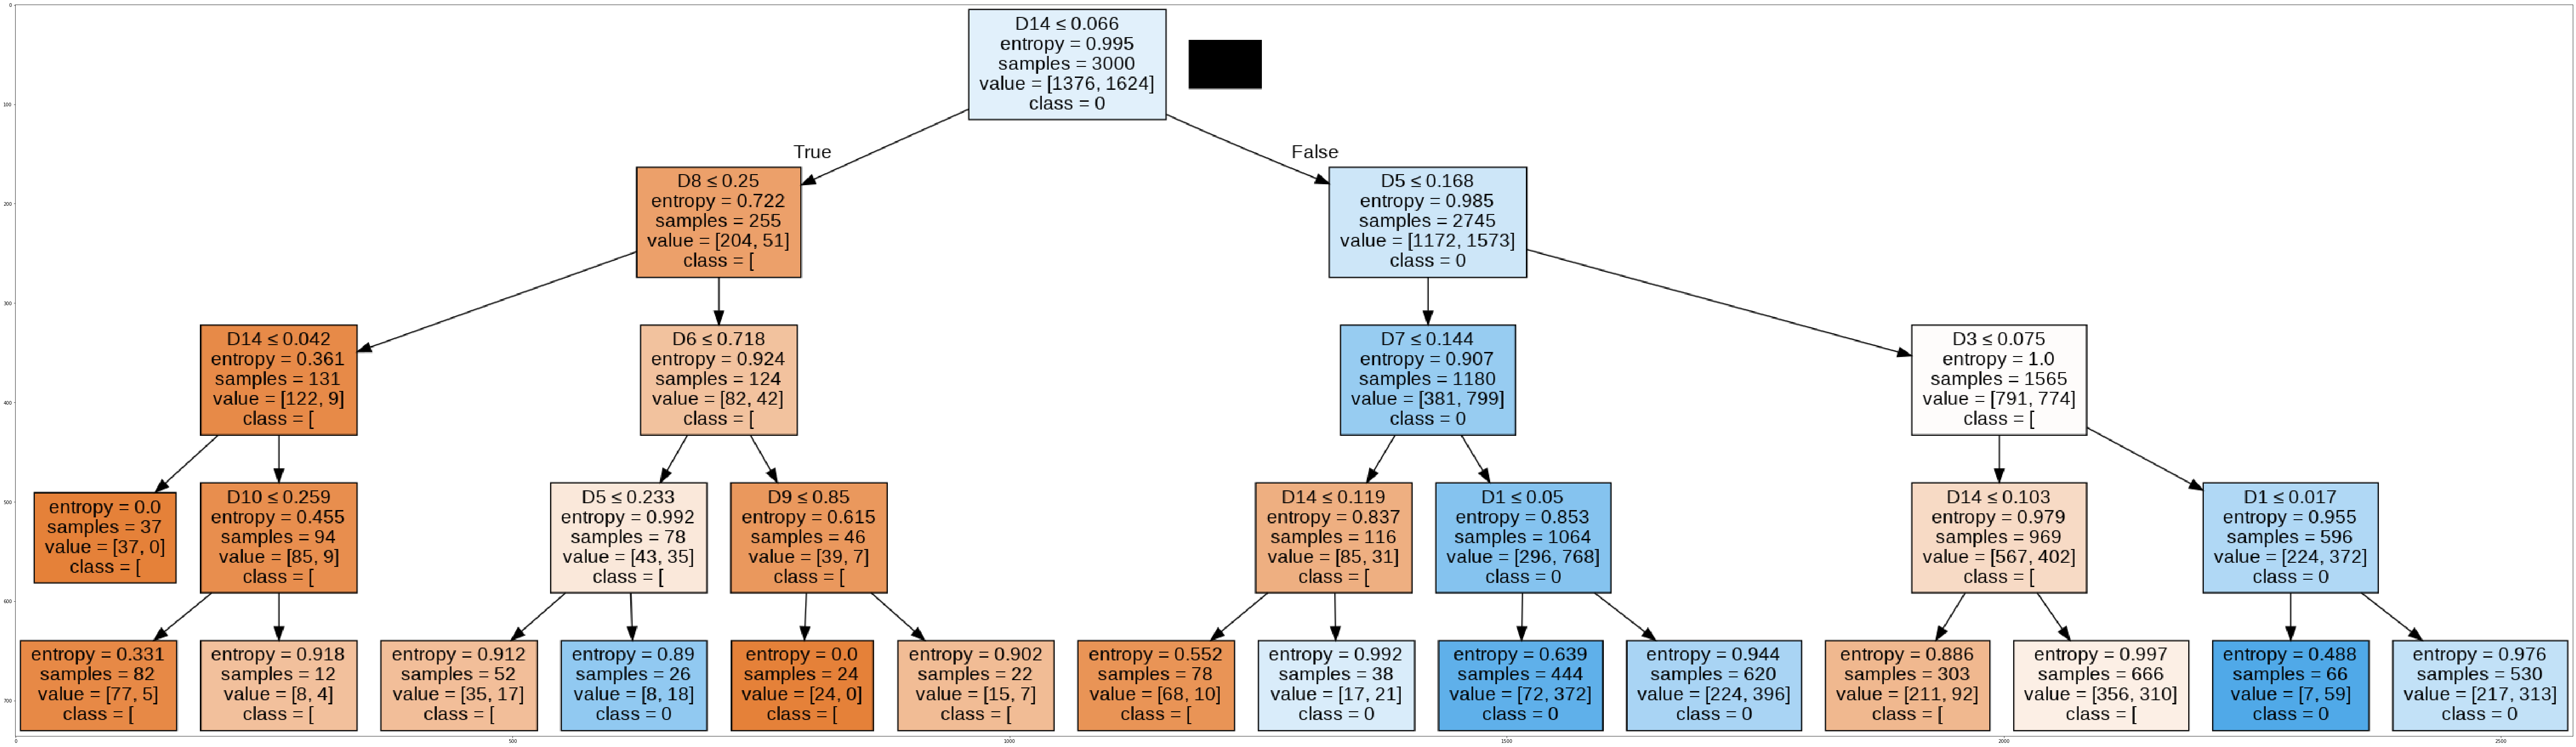

In [ ]:
dot_data = StringIO()
filename = "biotree.png"
featureNames = data.columns[0:19]
targetNames = data["target"].unique().tolist()
out=tree.export_graphviz(biotree,feature_names=featureNames, out_file=dot_data, class_names = str(np.unique(y_trainset)), filled=True, special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')

# **Je vais donc inclure tous les algorithmes dans ce code ci-dessous :**
 - Naive Bayes 
 - Arbre de décision 
 - KPPV
 - K-means

In [14]:
import numpy as np
import pandas as pd

url1 = "https://archive.ics.uci.edu/ml/machine-learning-databases/molecular-biology/promoter-gene-sequences/promoters.data"
columns = ["SIC","MICR","RISR"] 
# Class : SIC
# ID : MICR
# Sequence : RISR
Df = pd.read_csv(url1,names = columns) 

print("Les cas et les colonnes sont : ",Df.shape) # 106 cas , 3 colonnes
Df.head() # Affiche les 5 premières lignes de Df(dataframe)

Les cas et les colonnes sont :  (106, 3)


,SIC,MICR,RISR
0,+,S10,\t\ttactagcaatacgcttgcgttcggtggttaagtatgtataat...
1,+,AMPC,\t\ttgctatcctgacagttgtcacgctgattggtgtcgttacaat...
2,+,AROH,\t\tgtactagagaactagtgcattagcttatttttttgttatcat...
3,+,DEOP2,\taattgtgatgtgtatcgaagtgtgttgcggagtagatgttagaa...
4,+,LEU1_TRNA,\ttcgataattaactattgacgaaaagctgaaaaccactagaatgc...


> Certaines des __RISR__ commencent par le caractère spécial __t__ qui indique un espace de tabulation

In [30]:
for i in np.random.randint(0,106,5):
  print(Df["RISR"][i])
  print(len(Df["RISR"][i]))
  print("\n")

		tagagggtgtactccaagaagaggaagatgaggctagacgtctctgcatggagtatg
59


		caaggtagaatgctttgccttgtcggcctgattaatggcacgatagtcgcatcggat
59


		tgcacgggttgcgatagcctcagcgtattcaggtgcgagttcgatagtctcagagtc
59


		cgctaggactttcttgttgattttccatgcggtgttttgcgcaatgttaatcgcttt
59


		aactcaaggctgatacggcgagacttgcgagccttgtccttgcggtacacagcagcg
59




> - Les caractères __t__ ont été supprimés

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


   0_a  0_c  0_g  0_t  1_a  1_c  ...  56_a  56_c  56_g  56_t  SIC_+  SIC_-
0    0    0    0    1    1    0  ...     0     0     0     1      1      0
1    0    0    0    1    0    0  ...     1     0     0     0      1      0
2    0    0    1    0    0    0  ...     0     0     1     0      1      0
3    1    0    0    0    1    0  ...     0     1     0     0      1      0
4    0    0    0    1    0    1  ...     0     0     1     0      1      0

[5 rows x 230 columns]
   0_a  0_c  0_g  0_t  1_a  1_c  1_g  ...  55_g  55_t  56_a  56_c  56_g  56_t  SIC
0    0    0    0    1    1    0    0  ...     1     0     0     0     0     1    1
1    0    0    0    1    0    0    1  ...     0     0     1     0     0     0    1
2    0    0    1    0    0    0    0  ...     0     0     0     0     1     0    1
3    1    0    0    0    1    0    0  ...     0     1     0     1     0     0    1
4    0    0    0    1    0    1    0  ...     0     0     0     0     1     0    1

[5 rows x 229 columns]


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multi

Le score de validation croisée de K plus proches voisins est : 0.7982142857142857
Le score de validation croisée de Réseaux de neuronnes est : 0.8589285714285714
Le score de validation croisée de arbre de décision est : 0.7089285714285715
Le score de validation croisée de Random Forest est : 0.6857142857142857
Le score de validation croisée de AdaBoost est : 0.9107142857142858
Le score de validation croisée de Naive Bayes est : 0.8214285714285714
Le score de validation croisée de SVM Linear est : 0.8464285714285713
Le score de validation croisée de SVM rbf est : 0.8089285714285713
Le score de validation croisée de SVM Sigmoid est : 0.8589285714285714
0.8888888888888888
              precision    recall  f1-score   support

           0       0.78      0.88      0.82         8
           1       0.94      0.89      0.92        19

    accuracy                           0.89        27
   macro avg       0.86      0.88      0.87        27
weighted avg       0.90      0.89      0.89       

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


0.9629629629629629
              precision    recall  f1-score   support

           0       1.00      0.90      0.95        10
           1       0.94      1.00      0.97        17

    accuracy                           0.96        27
   macro avg       0.97      0.95      0.96        27
weighted avg       0.97      0.96      0.96        27

0.7407407407407407
              precision    recall  f1-score   support

           0       0.89      0.57      0.70        14
           1       0.67      0.92      0.77        13

    accuracy                           0.74        27
   macro avg       0.78      0.75      0.73        27
weighted avg       0.78      0.74      0.73        27

0.7037037037037037
              precision    recall  f1-score   support

           0       0.89      0.53      0.67        15
           1       0.61      0.92      0.73        12

    accuracy                           0.70        27
   macro avg       0.75      0.72      0.70        27
weighted avg     

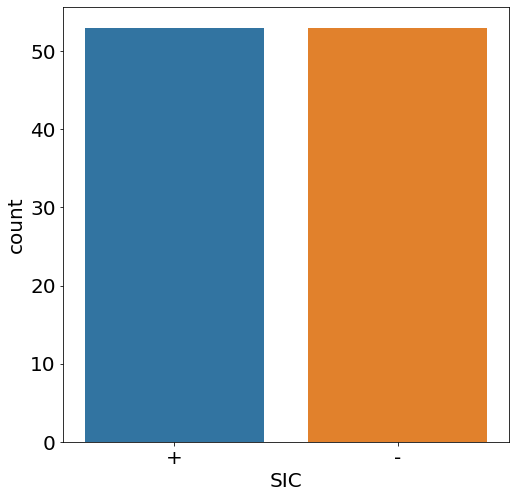

In [40]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


url = "https://archive.ics.uci.edu/ml/machine-learning-databases/molecular-biology/promoter-gene-sequences/promoters.data"
url1="https://archive.ics.uci.edu/ml/machine-learning-databases/00442/demonstrate_structure.csv"


noms_des_collones = ['SIC', 'MICR', 'RISR'] 

dataset = pd.read_csv(url, names=noms_des_collones)
dataset2=pd.read_csv(url1)

dataset.head()                       #Afficher les 5 lignes  contenu de fichier avec L'URL url

#il y'a  un (\t\) dans tout les Zadi.sequence pour les  supprimer  :

for i in range(dataset.shape[0]):
    
    dataset['RISR'][i] = dataset['RISR'][i].replace('\t','')

dataset.head() 


nucleotide_sequence = pd.DataFrame(np.random.randn(106,57))

for i in range(dataset.shape[0]):
    nucleotide_sequence.loc[i] = list(dataset['RISR'][i])
nucleotide_sequence['SIC'] = dataset['SIC']

nucleotide_sequence.head()  # afficher  nucleotide_sequence (5 premier elements)
plt.figure(figsize=(8,8)) 
plt.xticks(fontsize=20) 
plt.yticks(fontsize=20) 
plt.xlabel('SIC',fontsize=20) 
plt.ylabel('count',fontsize=20) 


sns.countplot(nucleotide_sequence['SIC']) # Affiche le nombre de chaque élément dans la colonne « SIC »


numerical_nucleotide = pd.get_dummies(nucleotide_sequence)

print(numerical_nucleotide.head())  # Affiche les 5 premières lignes de 'numerical_nucleotide’



# Supprimez l’une des colonnes de la classe et renommez l’autre simplement en ‘SIC’
numerical_nucleotide.drop('SIC_-',axis = 1,inplace = True)
numerical_nucleotide.rename(columns = {'SIC_+':'SIC'},inplace = True)


print(numerical_nucleotide.head()) # Affiche les 5 premières rangées de 'numerical_nucleotide’


#Maintenant que nous avons traité les données,l'étape suivante consiste à former les données à l'aide de classificateurs
#d'apprentissage automatique. 



from sklearn.model_selection import train_test_split

X = numerical_nucleotide.drop('SIC',axis = 1)
y = numerical_nucleotide['SIC']

X_train,X_test,y_train,y_test = train_test_split(X,y)

from sklearn.neighbors import KNeighborsClassifier                    
from sklearn.neural_network import MLPClassifier                      
from sklearn.tree import DecisionTreeClassifier                        
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier   
from sklearn.naive_bayes import GaussianNB                             
from sklearn.svm import SVC                                            
from sklearn.metrics import classification_report,accuracy_score     
from sklearn import model_selection


models = [KNeighborsClassifier(n_neighbors = 3),
          MLPClassifier(alpha = 1),
          DecisionTreeClassifier(max_depth = 5),
          RandomForestClassifier(max_depth=5,n_estimators=10,max_features=1),
          AdaBoostClassifier(),
          GaussianNB(),
          SVC(kernel = 'linear'),
          SVC(kernel = 'rbf'),
          SVC(kernel = 'sigmoid')]


validation_type = model_selection.KFold(n_splits = 10)


cv_result = []
for i in range(len(models)):
    cv_result.append(model_selection.cross_val_score(models[i],X_train,y_train,cv = validation_type,scoring = 'accuracy').mean())


model_names = ['K plus proches voisins','Réseaux de neuronnes',
               'arbre de décision','Random Forest',
               'AdaBoost','Naive Bayes','SVM Linear',
               'SVM rbf','SVM Sigmoid']

for i in range(len(models)):
    print('Le score de validation croisée de {} est : {}'.format(model_names[i],cv_result[i]))
    
    
for i in range(len(models)):
    a = models[i].fit(X_train,y_train) 
    y_predict = a.predict(X_test) 
    print(accuracy_score(y_predict,y_test))
    print(classification_report(y_predict,y_test))